In [1]:
from download_dataset import download

download()

notMNIST_small.tar.gz
File already exists.


### Задание 1.
#### Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [2]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np

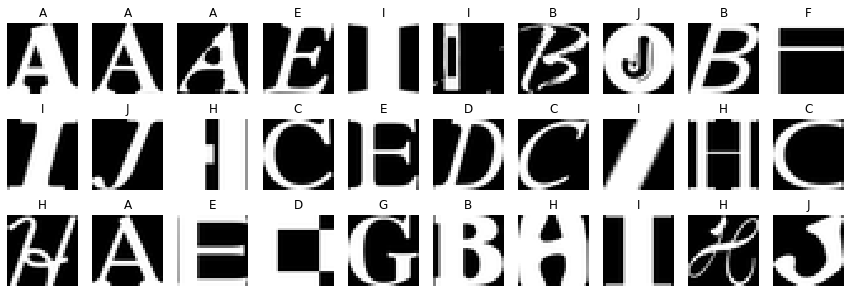

In [3]:
im_root = 'notMNIST_small'
dirs = os.listdir(im_root)
fig, ax = plt.subplots(3, 10, figsize=(15, 5))

for i in range(3):
    for j in range(10):
        dr = random.choice(dirs)
        im = random.choice(os.listdir(os.path.join(im_root, dr)))
        ax[i, j].imshow(plt.imread(os.path.join(im_root, dr, im)), cmap='gray')
        ax[i, j].set_title(dr)
        ax[i, j].axis('off')

### Задание 2.
#### Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).


In [4]:
classes_statistic = {}

for class_dir in os.listdir(im_root):
    class_path = os.path.join(im_root, class_dir)
    classes_statistic[class_dir] = len([name for name in os.listdir(class_path)])
    
total_count = sum(classes_statistic.values())

Number of examples for each class:


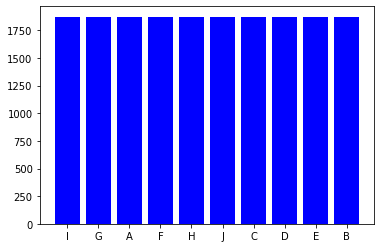

Approx count of examples:  18726


In [5]:
plt.bar(list(classes_statistic.keys()), classes_statistic.values(), color='b')
print("Number of examples for each class:")
plt.show()
print("Approx count of examples: ", total_count)

### Задание 3.
#### Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [6]:
import cv2

from config import image_size, pixel_depth
from config import train_percentage, val_percentage, test_percentage

In [7]:
train_size = int(total_count * train_percentage)
val_size = int(total_count * val_percentage)
test_size = int(total_count * test_percentage)

In [8]:
X = np.zeros((total_count, image_size, image_size))
y = np.zeros((total_count))

In [9]:
dirs = os.listdir(im_root)

label_dict = {}

counter = 0

for id_class, dir_class in enumerate(dirs):
    label_dict[id_class] = dir_class
    for image in os.listdir(os.path.join(im_root, dir_class)):
        try:
            X[counter, :, :] = plt.imread(os.path.join(im_root, dir_class, image))
            y[counter] = id_class
            counter += 1
        except:
            continue

In [10]:
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size+val_size)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=val_size, train_size=train_size)

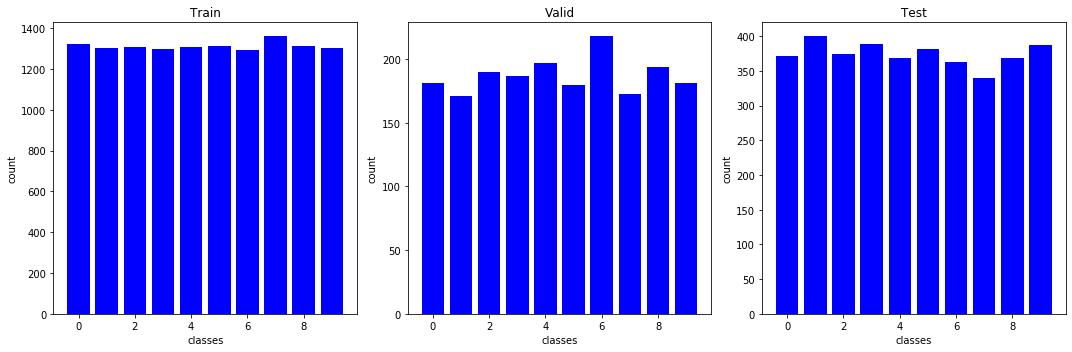

In [11]:
ys = [y_train, y_val, y_test]
xaxes = ['classes','classes','classes']
yaxes = ['count','count','count']
titles = ['Train','Valid','Test'] 

f,a = plt.subplots(1,3, figsize=(15, 5))
a = a.ravel()
for idx,ax in enumerate(a):
    unique, counts = np.unique(ys[idx], return_counts=True)
    ax.bar(unique, counts, color='b')
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
plt.tight_layout()

In [12]:
X_train[3,:,:].mean()

0.5984994011280146

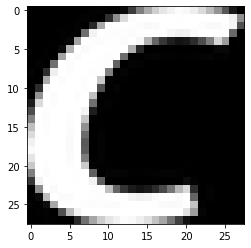

In [18]:
plt.imshow(X_train[8000,:,:], cmap="gray")
plt.show()

### Задание 5.
#### Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 0. 5.] [0. 3. 2. ... 2. 5. 5.]


/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 5. 5.] [0. 3. 2. ... 2. 5. 5.]


/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 5. 5.] [0. 3. 2. ... 2. 5. 5.]


/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 5. 5.] [0. 3. 2. ... 2. 5. 5.]


/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 5. 5.] [0. 3. 2. ... 2. 5. 5.]


/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 3. 2. ... 2. 5. 5.] [0. 3. 2. ... 2. 5. 5.]


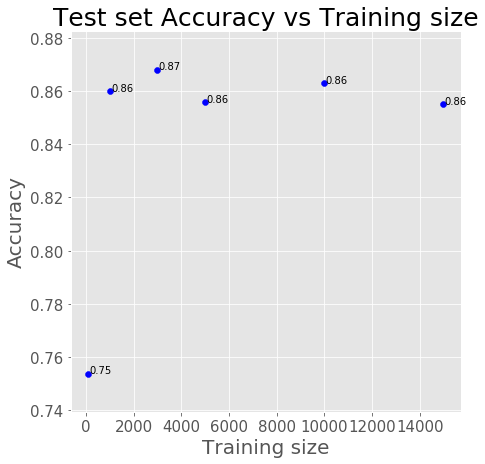

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
np.random.seed(42)
tr_sizes = [100, 1000, 3000, 5000, 10000, 15000]

# train models using different size of training set
test_scores, test_scores_sanitized = [[] for _ in range(2)]
for tr_size in tr_sizes:
    # random choose #train_size of training instances
    indices = np.random.randint(0, X_train.shape[0], tr_size)
    
    # reshape images to (train_size, dim * dim) for easier processing
    X = X_train[indices, :, :]\
        .reshape(-1, X_train.shape[1] * X_train.shape[2])
    y = y_train[indices]

    # train model
    clf = (LogisticRegression(random_state=10).fit(X, y))
    
    # test on original test set and the sanitized one
    y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
#     y_pred_sanitized = clf.predict(sanitized_test_dataset.reshape(sanitized_test_dataset.shape[0], -1))

    test_score = accuracy_score(y_pred, y_test)
    print(y_pred, y_test)
#     test_score_sanitized = accuracy_score(y_pred_sanitized, sanitized_test_labels)
    test_scores.append(test_score)
#     test_scores_sanitized.append(test_score_sanitized)

    
    
#     print(classification_report(test_labels, y_pred))
#     print(accuracy_score(test_labels, y_pred))

    
plt.figure(figsize=(7, 7))
plt.xlabel('Training size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for x, y in zip(tr_sizes, test_scores):
    plt.text(x + 50, y, '{:.2f}'.format(y))
for x, y in zip(tr_sizes, test_scores_sanitized):
    plt.text(x + 50, y, '{:.2f}'.format(y))
    
plt.scatter(tr_sizes, test_scores, label='Test score', color='blue');
# plt.scatter(train_sizes, test_scores_sanitized, label='Test score(Sanitized)', color='red');
# plt.legend(loc=4)
plt.title('Test set Accuracy vs Training size', fontsize=25);